### **<h1 align="center">Prediction Eligibilité à un Crédit</h1>**

## Import CSV to dataframe

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Importation des données du csv dans un dataframe
loan_data_df = pd.read_csv("loan_data.csv")

## Initial Data Exploration

### Dataframe Statistics

#### Shape

In [50]:
loan_data_df.shape

(981, 13)

#### Column Types

In [51]:
loan_data_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Missing data

In [52]:
loan_data_df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

### Distribution Graphs

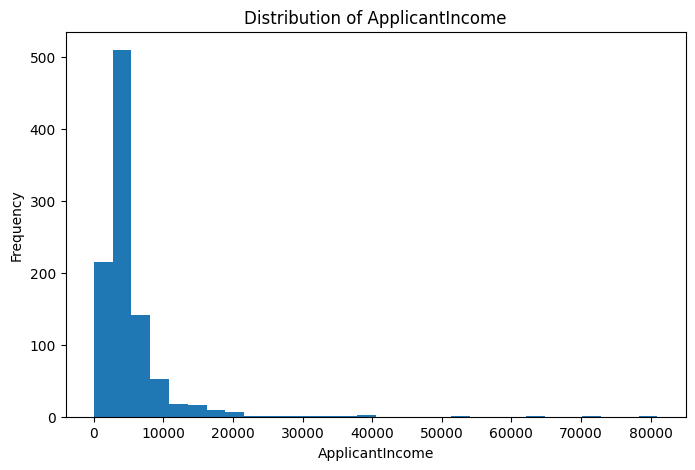

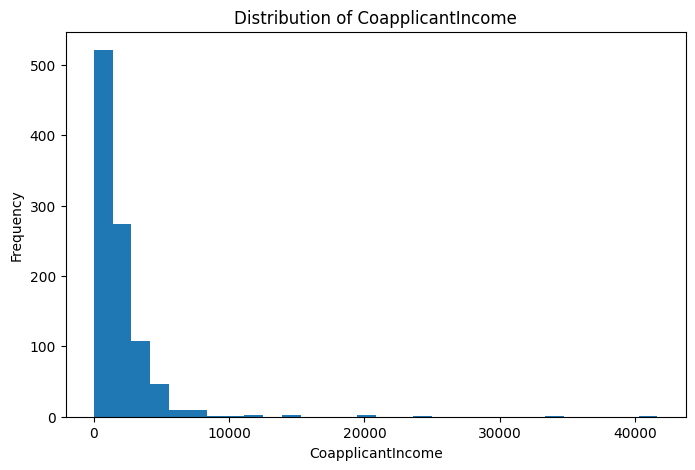

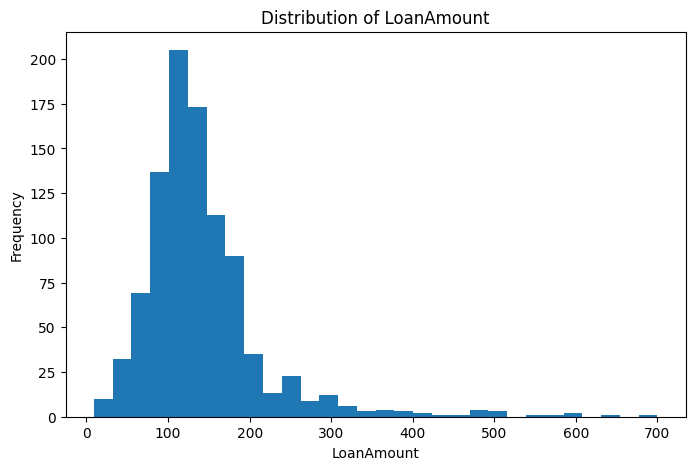

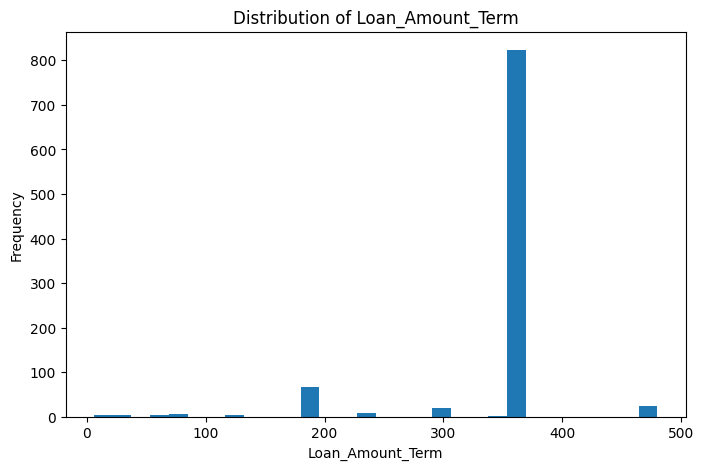

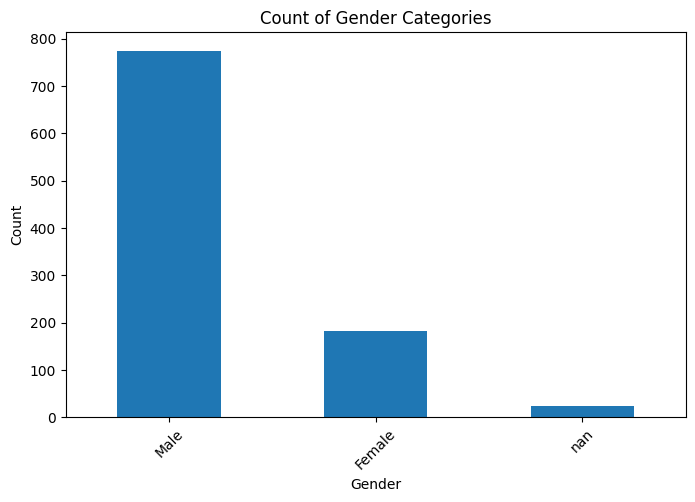

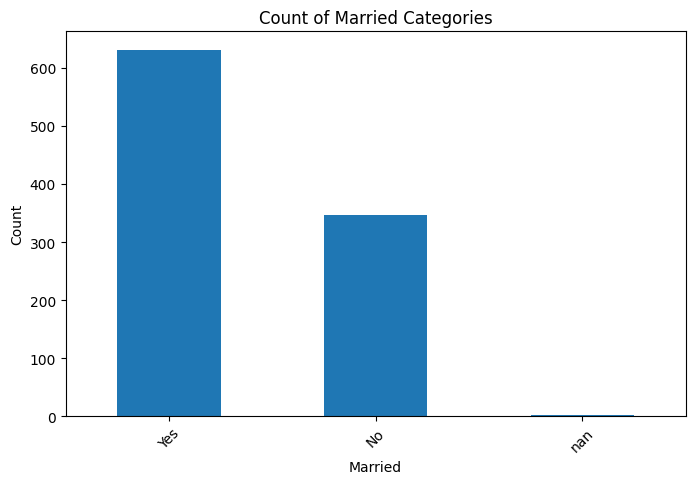

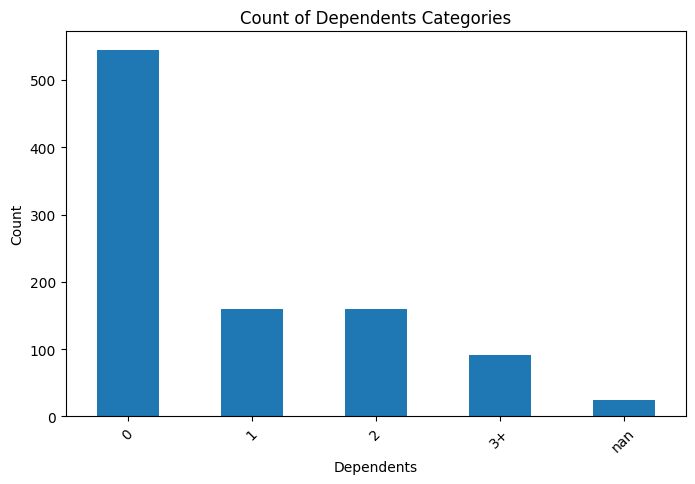

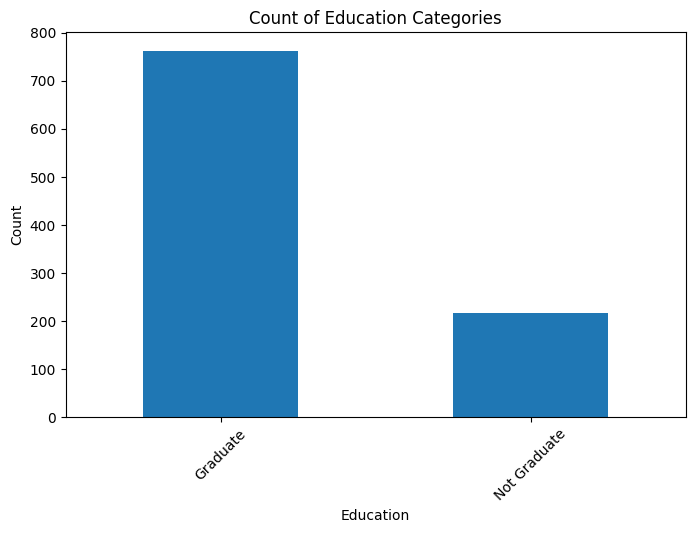

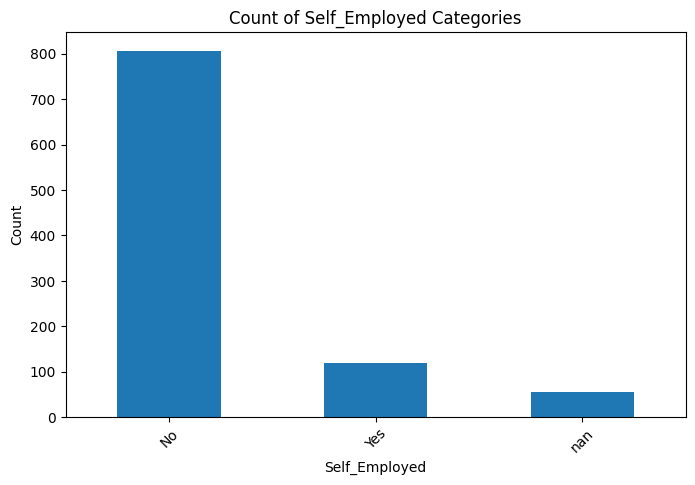

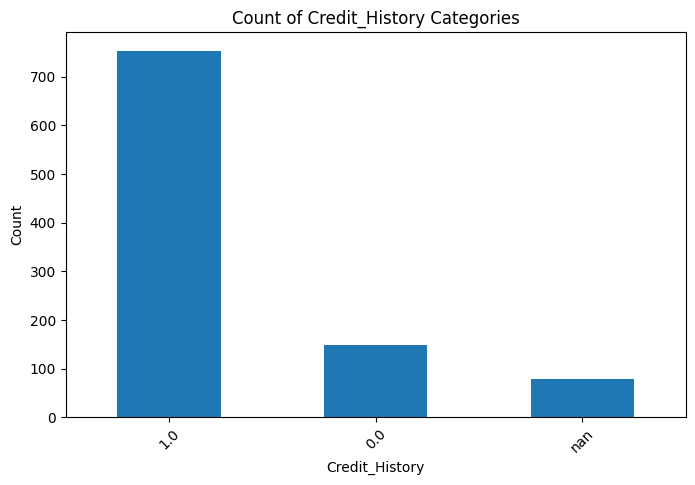

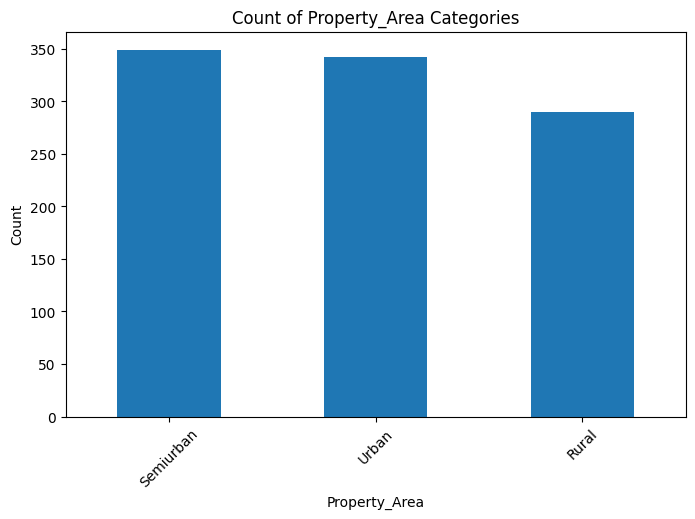

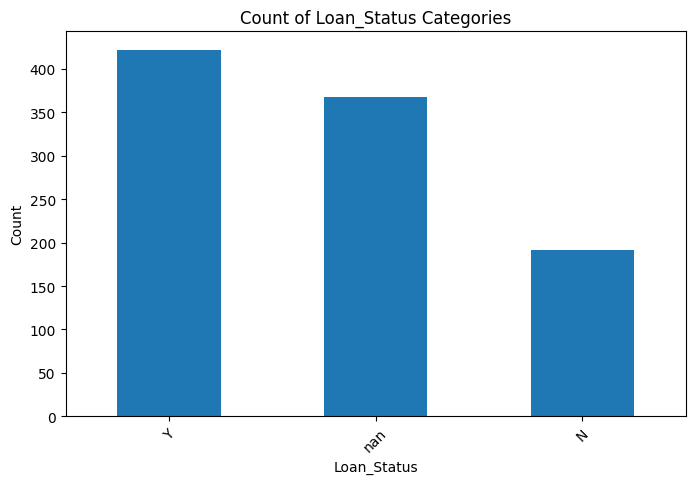

In [53]:
# Afficher les distributions des variables numériques
def display_numerical_distribution(df, numerical_columns):
    """
    Display the distribution of numerical columns in the dataframe.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    numerical_columns (list): List of numerical columns to plot.
    """
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        df[column].dropna().hist(bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show()

# Afficher les distributions des variables catégorielles
def display_categorical_distribution(df, categorical_columns):
    """
    Display the distribution of categorical columns in the dataframe.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    categorical_columns (list): List of categorical columns to plot.
    """
    for column in categorical_columns:
        plt.figure(figsize=(8, 5))
        df[column].value_counts(dropna=False).plot(kind='bar')
        plt.title(f'Count of {column} Categories')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(False)
        plt.show()

# Visualisation des colonnes numériques
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
display_numerical_distribution(loan_data_df, numerical_columns)

# Visualisation des variables catégoriques, y compris la cible
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
display_categorical_distribution(loan_data_df, categorical_columns)

### Missing Value Heatmap

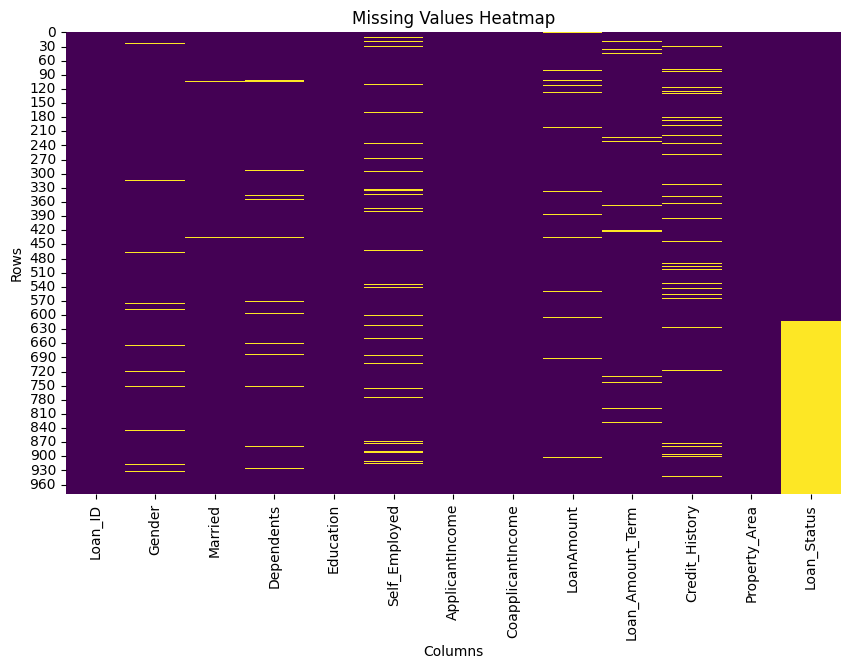

In [54]:
def plot_missing_values(dataframe):
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

plot_missing_values(loan_data_df)

### Correlation Matrix

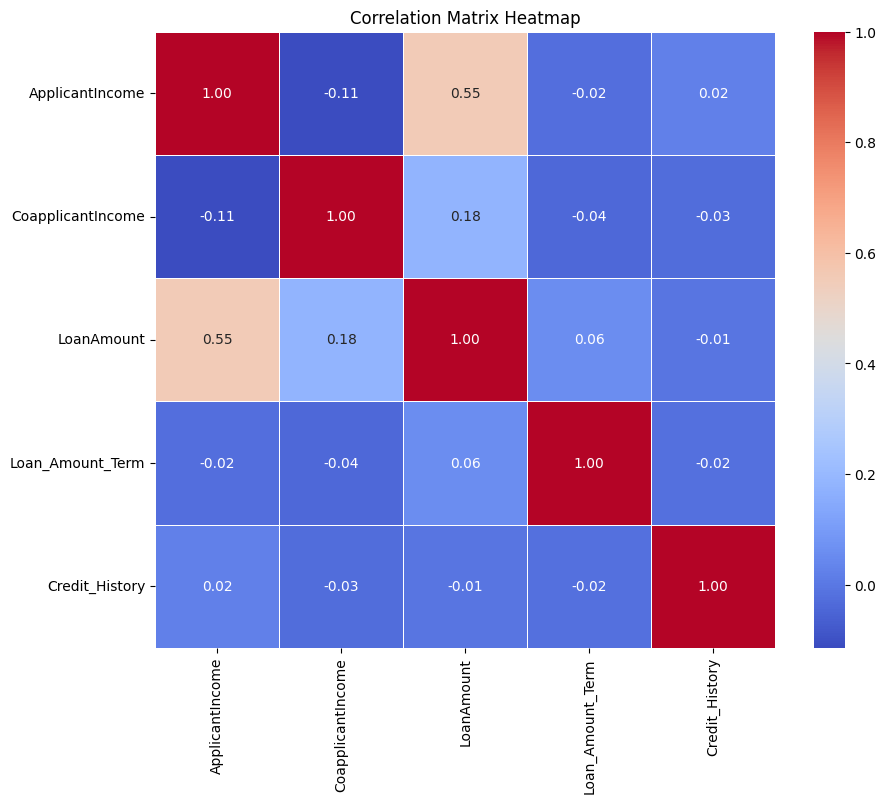

In [55]:
def display_correlation_matrix(dataframe):
    """
    Displays a heatmap of the correlation matrix for all numeric columns in the dataframe.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the data.

    Returns:
    - None: Displays the heatmap directly.
    """
    # Select only numeric columns
    numeric_dataframe = dataframe.select_dtypes(include=['number'])

    if numeric_dataframe.empty:
        print("No numeric columns found in the dataframe.")
        return

    # Calculate and display the correlation matrix
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_dataframe.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()


# Display correlation matrix heatmap
display_correlation_matrix(loan_data_df)

### Correlation to Target Variable

Target column 'Loan_Status' encoded as: {'Y': 1, 'N': 0}


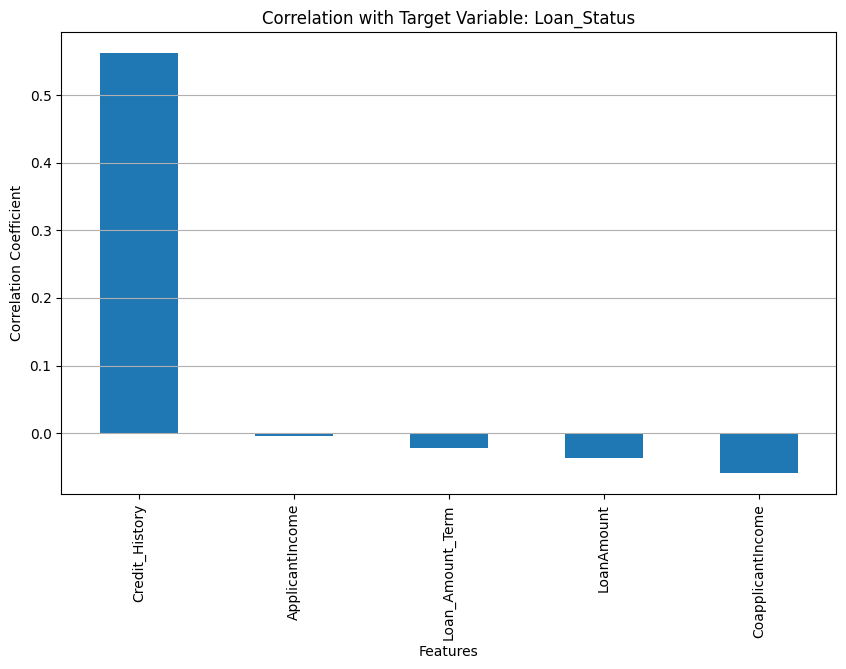

In [56]:
def display_correlations_with_target(dataframe, target_column):
    """
    Displays a bar plot of correlations between all numeric columns and the target variable.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - target_column (str): The target column to calculate correlations with.

    Returns:
    - None: Displays the bar plot directly.
    """
    if target_column not in dataframe.columns:
        print(f"Target column '{target_column}' not found in the dataframe.")
        return

    # Encode the target column if it is non-numeric
    if not pd.api.types.is_numeric_dtype(dataframe[target_column]):
        dataframe = dataframe.copy()  # Avoid modifying the original dataframe
        target_mapping = {'Y': 1, 'N': 0}  # Inverted encoding
        dataframe[target_column] = dataframe[target_column].map(target_mapping)
        print(f"Target column '{target_column}' encoded as: {target_mapping}")

    # Select numeric columns
    numeric_dataframe = dataframe.select_dtypes(include=['number'])

    if target_column not in numeric_dataframe.columns:
        print(f"Target column '{target_column}' could not be converted to numeric.")
        return

    # Calculate correlations with the target column
    correlations = numeric_dataframe.corr()[target_column].drop(target_column)

    # Plot the correlations
    plt.figure(figsize=(10, 6))
    correlations.sort_values(ascending=False).plot(kind='bar')
    plt.title(f"Correlation with Target Variable: {target_column}")
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("Features")
    plt.grid(axis='y')
    plt.show()


# Display correlations with target variable 'Loan_Status'
display_correlations_with_target(loan_data_df, target_column="Loan_Status")

### Outliers Graphs

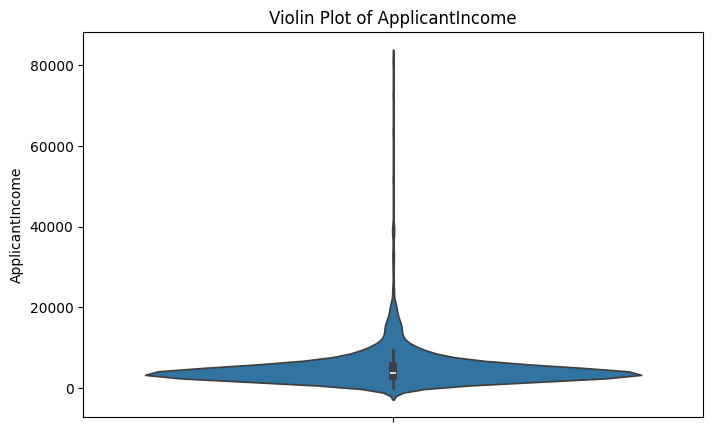

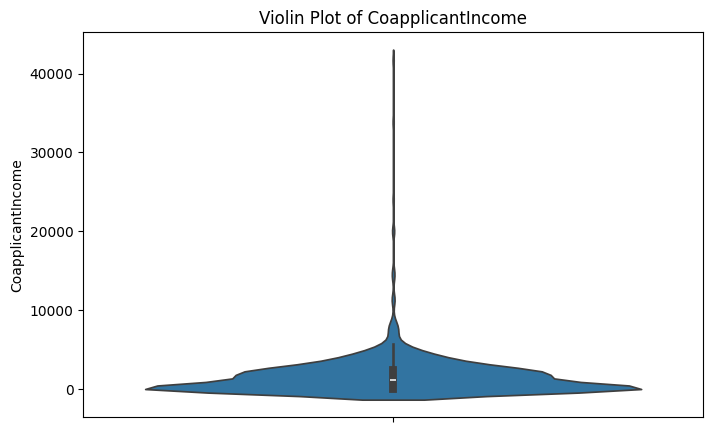

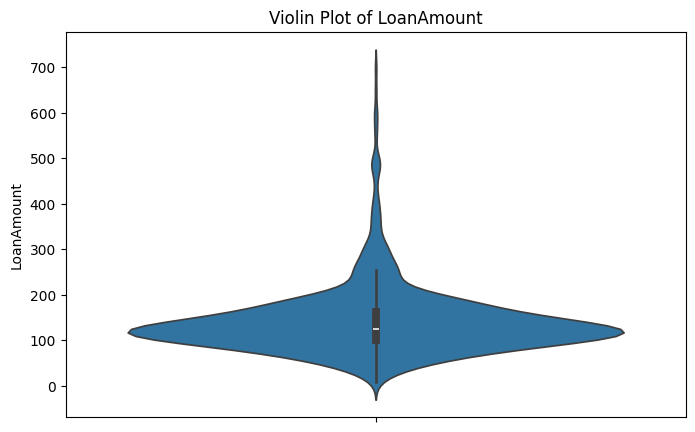

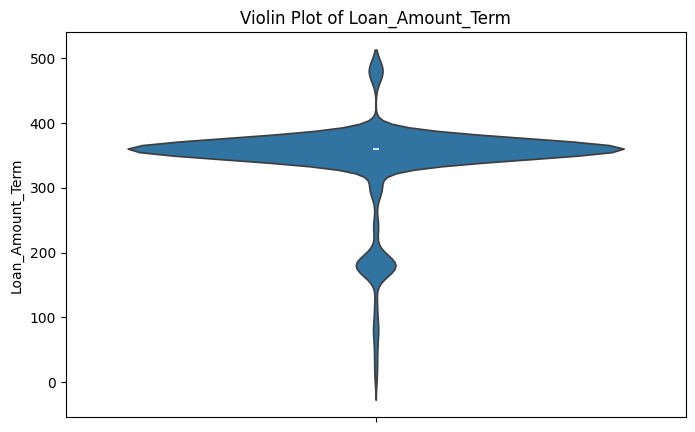

In [57]:
def display_outliers(dataframe, selected_columns):
    """
    Displays boxplots for the selected columns to visualize potential outliers.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - selected_columns (list): List of columns to display outliers.

    Returns:
    - None: Displays the graphs directly.
    """
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            plt.figure(figsize=(8, 5))
            sns.boxplot(y=dataframe[column])
            plt.title(f'Boxplot of {column}')
            plt.ylabel(column)
            plt.show()
        else:
            print(f"Column '{column}' is not numeric and was skipped.")

def display_outliers_violin(dataframe, selected_columns):
    """
    Displays violin plots for the selected columns to visualize potential outliers.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - selected_columns (list): List of columns to display outliers.

    Returns:
    - None: Displays the graphs directly.
    """
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            plt.figure(figsize=(8, 5))
            sns.violinplot(y=dataframe[column])
            plt.title(f'Violin Plot of {column}')
            plt.ylabel(column)
            plt.show()
        else:
            print(f"Column '{column}' is not numeric and was skipped.")

# Visualize outliers
display_outliers_violin(loan_data_df, selected_columns=["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

## Data preprocessing

### Duplicates Handling

In [58]:
def find_duplicates(dataframe, selected_columns):
    """
    Finds duplicates in the given dataframe based on selected columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to search for duplicates.
    - selected_columns (list): The columns to check for duplicates.

    Returns:
    - int: Number of duplicate rows found.
    """
    duplicates = dataframe.duplicated(subset=selected_columns)
    return duplicates.sum()

def drop_duplicates(dataframe, keep):
    """
    Drops duplicate rows in the dataframe.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe from which to remove duplicates.
    - keep (str): Which duplicates to keep ('first', 'last', or False).

    Returns:
    - pd.DataFrame: A dataframe with duplicates removed.
    """
    return dataframe.drop_duplicates(keep=keep)

# Find duplicates
num_duplicates = find_duplicates(loan_data_df, selected_columns=["Loan_ID"])
print(f"Number of duplicates: {num_duplicates}")

# Drop duplicates if any
if num_duplicates > 0:
    loan_data_df_cleaned = drop_duplicates(loan_data_df, keep='first')  # Keep the first occurrence
    print("Duplicates removed. Cleaned DataFrame:")
    print(loan_data_df_cleaned)
else:
    loan_data_df_cleaned = loan_data_df

loan_data_df_cleaned.describe()

Number of duplicates: 0


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Handling Missing Values

#### Functions

In [59]:
def fill_missing_with_knn(dataframe, selected_columns, n_neighbors=5):
    """
    Fills missing values in selected columns using K-Nearest Neighbors (KNN).

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where missing values will be imputed.
    - n_neighbors (int): Number of neighbors to use for KNN imputation.

    Returns:
    - pd.DataFrame: DataFrame with missing values imputed using KNN.
    """
    # Ensure selected columns are numeric, as KNN requires numeric data
    numeric_columns = [col for col in selected_columns if pd.api.types.is_numeric_dtype(dataframe[col])]
    
    # Warn if some selected columns are not numeric
    if len(numeric_columns) < len(selected_columns):
        print("Warning: Non-numeric columns were ignored for KNN imputation.")

    # Copy the dataframe to avoid modifying the original
    dataframe_copy = dataframe.copy()

    # Apply KNN imputation to numeric columns
    imputer = KNNImputer(n_neighbors=n_neighbors)
    dataframe_copy[numeric_columns] = imputer.fit_transform(dataframe_copy[numeric_columns])

    return dataframe_copy


def split_dataframe_on_missing_target(dataframe, target_column):
    """
    Splits a dataframe into two based on missing values in the target column.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to split.
    - target_column (str): The column to check for missing values.

    Returns:
    - pd.DataFrame: A dataframe containing rows where the target_column has no missing values.
    - pd.DataFrame: A dataframe containing rows where the target_column has missing values.
    """
    # Create a mask for rows with missing values in the target column
    missing_target_df = dataframe[dataframe[target_column].isnull()]
    
    # Create a dataframe without missing values in the target column
    cleaned_df = dataframe.dropna(subset=[target_column])
    
    return cleaned_df, missing_target_df


def fill_missing_with_value(dataframe, selected_columns, value):
    """
    Fills missing values in selected columns with the given value.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where missing values will be replaced.
    - value: The value to replace missing data with.

    Returns:
    - pd.DataFrame: DataFrame with missing values replaced.
    """
    dataframe[selected_columns] = dataframe[selected_columns].fillna(value)
    return dataframe

def fill_missing_with_mean(dataframe, selected_columns):
    """
    Fills missing values in selected columns with the mean of each column.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where missing values will be replaced.

    Returns:
    - pd.DataFrame: DataFrame with missing values replaced by column mean.
    """
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            dataframe[column] = dataframe[column].fillna(dataframe[column].mean())
    return dataframe

def fill_missing_with_median(dataframe, selected_columns):
    """
    Fills missing values in selected columns with the median of each column.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where missing values will be replaced.

    Returns:
    - pd.DataFrame: DataFrame with missing values replaced by column median.
    """
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            dataframe[column] = dataframe[column].fillna(dataframe[column].median())
    return dataframe

def drop_rows_with_missing(dataframe, selected_columns):
    """
    Drops rows with missing values in the selected columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns to check for missing values.

    Returns:
    - pd.DataFrame: DataFrame with rows containing missing values removed.
    """
    return dataframe.dropna(subset=selected_columns)

# Do not use, not useful in this case
def drop_columns_with_missing(dataframe, selected_columns=None):
    """
    Drops columns with missing values. If selected_columns is None, checks all columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list or None): Columns to check for missing values. If None, checks all columns.

    Returns:
    - pd.DataFrame: DataFrame with columns containing missing values removed.
    """
    if selected_columns is None:
        return dataframe.dropna(axis=1)
    else:
        return dataframe.drop(columns=[col for col in selected_columns if dataframe[col].isnull().any()])

#### Applying functions to this dataframe

##### Split the dataframe based on missing values in 'Loan_Status'

In [60]:
loan_data_df_cleaned, missing_target_df = split_dataframe_on_missing_target(loan_data_df_cleaned, target_column="Loan_Status")

In [61]:
# Checks resulting dataframe
loan_data_df_cleaned.shape

(614, 13)

In [62]:
loan_data_df_cleaned.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Low impact handling (few values)

In [63]:
loan_data_df_cleaned = fill_missing_with_value(loan_data_df_cleaned, selected_columns=["Gender"], value="Unknown")

loan_data_df_cleaned = drop_rows_with_missing(loan_data_df_cleaned, selected_columns=["Married", "Dependents", "LoanAmount", "Loan_Amount_Term"])

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10320\4149541398.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[selected_columns] = dataframe[selected_columns].fillna(value)


In [64]:
loan_data_df_cleaned.shape

(566, 13)

In [65]:
loan_data_df_cleaned.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
loan_data_df_cleaned.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,566.000000,566.000000,566.000000,566.000000,517.000000
mean,5464.480565,1654.676537,147.438163,341.660777,0.856867
std,6290.210497,3018.828495,87.107637,65.226615,0.350548
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2883.750000,0.000000,100.000000,360.000000,1.000000
50%,3806.000000,1221.000000,128.000000,360.000000,1.000000
75%,5818.750000,2297.250000,170.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


##### High impact handling (lots of values)

In [67]:
#loan_data_df_cleaned = fill_missing_with_mean(loan_data_df_cleaned, selected_columns=["LoanAmount", "ApplicantIncome"])

#loan_data_df_cleaned = fill_missing_with_median(loan_data_df_cleaned, selected_columns=["LoanAmount"])

#loan_data_df_cleaned = drop_rows_with_missing(loan_data_df_cleaned, selected_columns=["Credit_History"])

### Outliers

#### Functions

In [68]:
def remove_outliers_iqr(dataframe, selected_columns):
    """
    Removes rows containing outliers based on the IQR method for the selected columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where outliers will be removed.

    Returns:
    - pd.DataFrame: A dataframe with outliers removed.
    """
    df_cleaned = dataframe.copy()
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[column]):
            q1 = df_cleaned[column].quantile(0.25)
            q3 = df_cleaned[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned


def cap_outliers(dataframe, selected_columns, method="iqr"):
    """
    Caps outliers to the lower and upper bounds based on the chosen method.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where outliers will be capped.
    - method (str): Method to calculate bounds ("iqr" or "zscore").

    Returns:
    - pd.DataFrame: A dataframe with capped outliers.
    """
    df_capped = dataframe.copy()
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(df_capped[column]):
            if method == "iqr":
                q1 = df_capped[column].quantile(0.25)
                q3 = df_capped[column].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
            elif method == "zscore":
                mean = df_capped[column].mean()
                std = df_capped[column].std()
                lower_bound = mean - 3 * std
                upper_bound = mean + 3 * std
            else:
                raise ValueError("Invalid method. Choose 'iqr' or 'zscore'.")
            
            df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)
    return df_capped


def replace_outliers_with_median(dataframe, selected_columns):
    """
    Replaces outliers in the selected columns with the column's median value.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where outliers will be replaced.

    Returns:
    - pd.DataFrame: A dataframe with outliers replaced by median values.
    """
    df_replaced = dataframe.copy()
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(df_replaced[column]):
            q1 = df_replaced[column].quantile(0.25)
            q3 = df_replaced[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            median = df_replaced[column].median()
            df_replaced[column] = df_replaced[column].apply(
                lambda x: median if x < lower_bound or x > upper_bound else x
            )
    return df_replaced

#### Outliers handling

In [69]:
# Remove outliers using IQR
loan_data_df_cleaned = remove_outliers_iqr(loan_data_df_cleaned, selected_columns=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"])

In [70]:
loan_data_df_cleaned.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,476.000000,476.000000,476.000000,476.000000,436.000000
mean,3983.926471,1317.917899,123.466387,341.344538,0.857798
std,1804.324601,1396.523643,41.447810,67.185517,0.349658
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2717.750000,0.000000,98.750000,360.000000,1.000000
50%,3565.000000,1293.500000,120.000000,360.000000,1.000000
75%,4750.000000,2173.000000,150.000000,360.000000,1.000000
max,10000.000000,5701.000000,240.000000,480.000000,1.000000


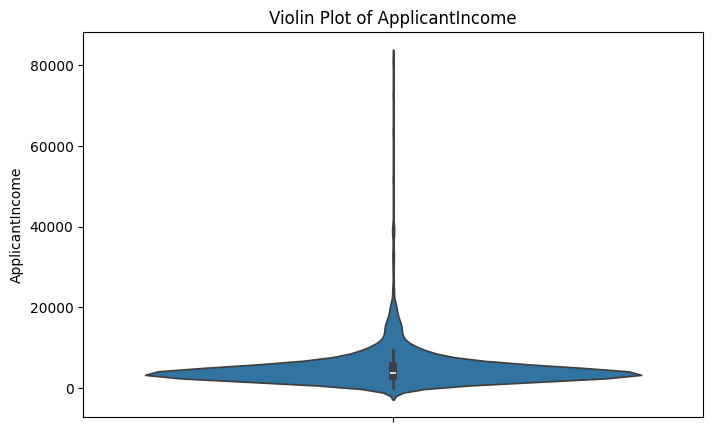

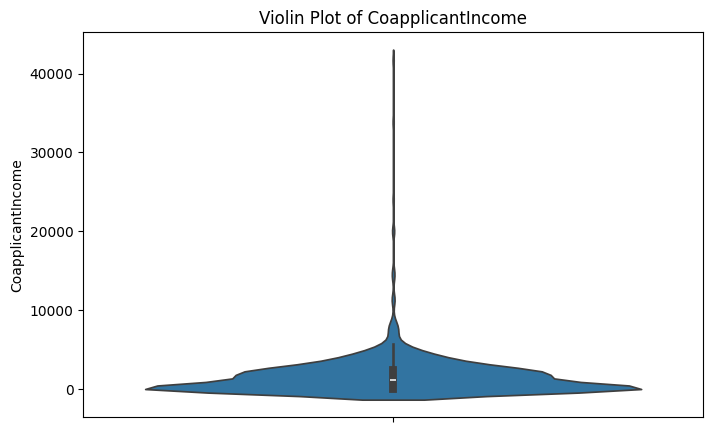

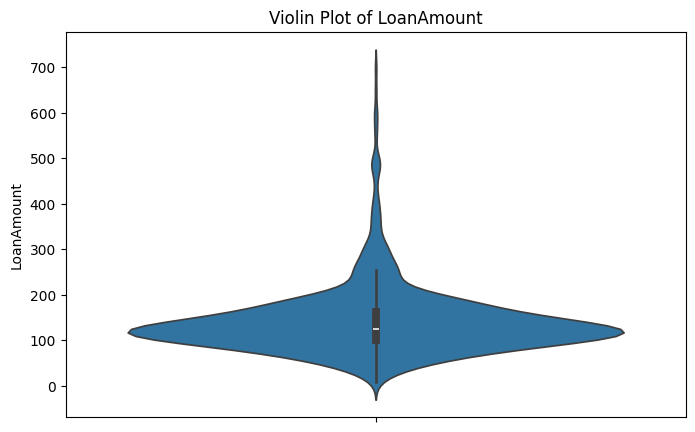

In [71]:
# Visualize outliers
display_outliers_violin(loan_data_df, selected_columns=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"])

## Split Train/Test

In [72]:
def split_dataset(dataframe, split_percentage=0.8):
    """
    Splits a dataframe into training and testing datasets.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to split.
    - split_percentage (float): The proportion of the dataset to include in the training set.

    Returns:
    - pd.DataFrame: Training dataset.
    - pd.DataFrame: Testing dataset.
    """
    if not (0 < split_percentage < 1):
        raise ValueError("split_percentage must be a float between 0 and 1.")

    train_df, test_df = train_test_split(dataframe, test_size=1-split_percentage, random_state=42)
    return train_df, test_df

train_df, test_df = split_dataset(loan_data_df_cleaned, split_percentage=0.8)

## Handle Target Variable Distribution

In [73]:
def balance_target_distribution(dataframe, target_variable):
    """
    Balances the distribution of the target variable by randomly removing rows from overrepresented classes.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to balance.
    - target_variable (str): The name of the target column to balance.

    Returns:
    - pd.DataFrame: A dataframe with balanced target variable distribution.
    """
    # Count the number of rows in each class
    target_counts = dataframe[target_variable].value_counts()

    # Find the minimum count among all classes
    min_count = target_counts.min()

    # Balance each class
    balanced_df = pd.concat(
        [dataframe[dataframe[target_variable] == value].sample(min_count, random_state=42)
         for value in target_counts.index]
    )

    # Shuffle the balanced dataframe
    return balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Balance the target variable
train_df = balance_target_distribution(train_df, target_variable="Loan_Status")

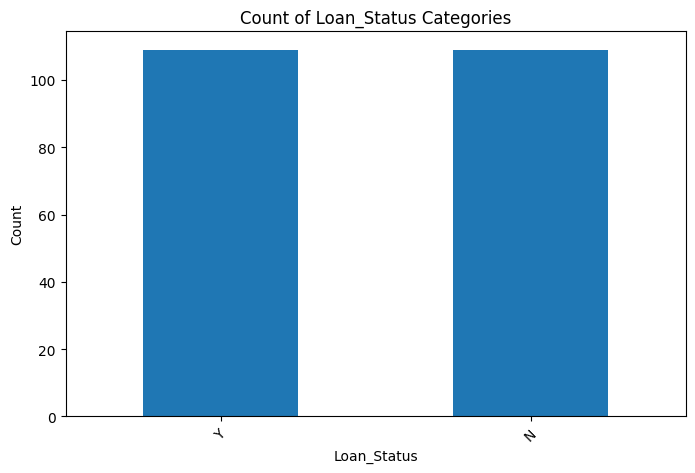

In [77]:
display_categorical_distribution(train_df, ["Loan_Status"])

## Encoding

### Use KNN to fill missing values of categorical columns

In [ ]:
# Remove comment when encoded complete
#loan_data_df_encoded = fill_missing_with_knn(loan_data_df_encoded, selected_columns=["Self_Employed", "Credit_History"], n_neighbors=5)

## Standardization / Normalisation

## Columns Selection for Model Training

## Model choice

## Model training

## Model Evaluation